# Antes de empezar:
Lee el archivo README.md <p>
Comenta todo lo que puedas y utiliza los recursos del archivo README.md
¡Feliz aprendizaje!

In [1]:
# Import your libraries:
import pandas as pd
from sklearn.datasets import load_diabetes

# Reto 1 - Explorar los conjuntos de datos de Scikit-Learn

Antes de empezar a trabajar con nuestros propios conjuntos de datos, exploremos primero los conjuntos de datos incluidos en esta biblioteca de Python. Estos conjuntos de datos se han limpiado y formateado para su uso en algoritmos de ML.

En primer lugar, cargaremos el conjunto de datos de la diabetes. Hazlo en la celda de abajo importando los conjuntos de datos y luego cargando el conjunto de datos en la `diabetes` utilizando la función `load_diabetes()`.

In [4]:

from sklearn import datasets
available_datasets = dir(datasets)
loadable_datasets = [dataset for dataset in available_datasets if 'load_' in dataset]

print("Conjuntos de datos disponibles en sklearn.datasets:")
for dataset in loadable_datasets:
    print(dataset)

Conjuntos de datos disponibles en sklearn.datasets:
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine


In [5]:
diabetes = load_diabetes()

Vamos a explorar esta variable observando los diferentes atributos. Para ello, mira las `keys()` de esta variable.

In [9]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

El siguiente paso es leer la descripción del conjunto de datos. Imprima la descripción en la celda siguiente utilizando el atributo `DESCR` de la variable `diabetes`

In [13]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

¿Cuáles son las variables de este conjunto de datos según la descripción? Enuméralas en la celda markdown siguiente

   - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

#### Introduzca aquí su respuesta:

edad, sexo, índice de masa corporal, tensión arterial media, s1, s2, s3, s4, s5, s6

Ahora explora los datos. Scikit-learn normalmente toma arrays numpy 2D como entrada (aunque también se aceptan dataframes pandas). En la celda de abajo encuentra la forma del array numpy contenido en la parte de datos de la variable diabetes.

In [14]:
print(diabetes.data.shape)
#442 muestras y 10 características

(442, 10)


# Reto 2 - Realizar aprendizaje supervisado en el conjunto de datos

#### Los datos ya se han dividido en variables predictoras y de respuesta. La variable de respuesta se encuentra en la parte «objetivo» de la variable. 

Dada esta información, vamos a aplicar lo que hemos aprendido previamente sobre regresión lineal y aplicar el algoritmo al conjunto de datos de la diabetes. En la celda de abajo, importa la clase de regresión lineal de sklearn. 

In [15]:
from sklearn.linear_model import LinearRegression

Inicializar el modelo en la variable `diabetes_model`.

In [16]:
diabetes_model = LinearRegression()

En la celda de abajo, ajusta el modelo e imprime el intercepto y los coeficientes del modelo.

In [17]:
X = diabetes.data
y = diabetes.target

diabetes_model.fit(X, y)

intercept = diabetes_model.intercept_
coefficients = diabetes_model.coef_

print("Intercepto:", intercept)
print("Coeficientes:")
for feature, coef in zip(diabetes.feature_names, coefficients):
    print(f"{feature}: {coef}")

Intercepto: 152.13348416289597
Coeficientes:
age: -10.009866299810438
sex: -239.81564367242342
bmi: 519.8459200544607
bp: 324.3846455023231
s1: -792.1756385522303
s2: 476.73902100525714
s3: 101.04326793803412
s4: 177.06323767134637
s5: 751.2736995571034
s6: 67.62669218370495


# Reto bonus 1 - Realizar una prueba de hipótesis sobre el modelo

Una vez que hemos generado un modelo lineal, podemos probar cada coeficiente utilizando una prueba t para ver si el intervalo de confianza de la variable contiene cero. También podemos realizar una prueba F global para comprobar si al menos un coeficiente es significativamente distinto de cero. 

Consulte el recurso en este [enlace](https://onlinecourses.science.psu.edu/stat501/node/297/) para obtener más detalles y realice las pruebas t para el modelo anterior. Además, interprete los resultados y enumere los coeficientes que son significativamente diferentes de cero.


Sugerencia: utilice el paquete statsmodels.

Su resultado debería ser similar al siguiente

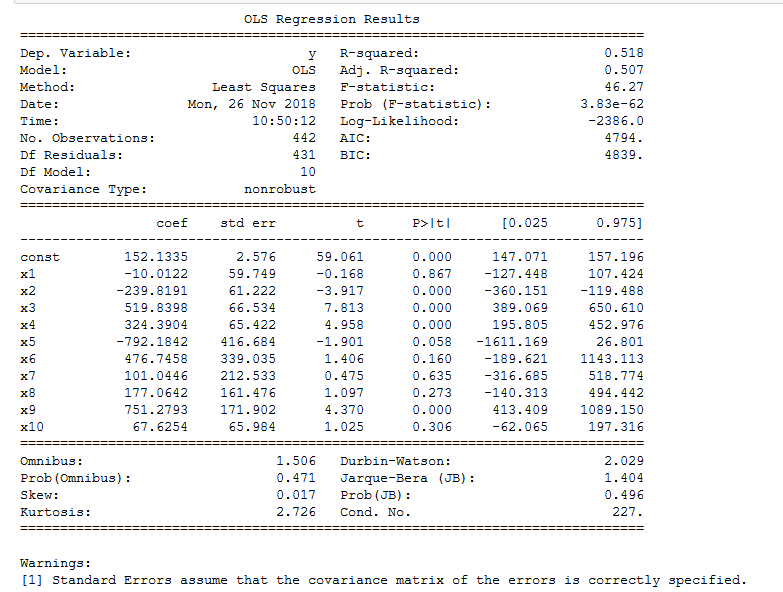

In [20]:
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [19]:
import numpy as np
import statsmodels.api as sm
# Añadir una constante a las variables predictoras
X = sm.add_constant(diabetes.data)

# Crear el modelo OLS (Ordinary Least Squares)
model = sm.OLS(y, X)

# Ajustar el modelo
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Interpretación de los resultados:
# - El coeficiente de cada variable se considera significativamente diferente de cero
#   si el valor p (P>|t|) es menor que el nivel de significancia (por ejemplo, 0.05).

# Extraer los coeficientes y sus valores p
coef_p_values = pd.DataFrame({
    'Coefficient': results.params,
    'P-Value': results.pvalues
})

# Filtrar los coeficientes significativamente diferentes de cero
significant_coef = coef_p_values[coef_p_values['P-Value'] < 0.05]

significant_coef

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           3.83e-62
Time:                        18:33:14   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

,Coefficient,P-Value
0,152.133484,1.010082e-208
2,-239.815644,1.041671e-04
3,519.845920,4.296391e-14
4,324.384646,1.024278e-06
9,751.273700,1.555899e-05


# Reto 3 - Realizar aprendizaje supervisado en un marco de datos Pandas

Ahora que hemos visto los datos que han sido formateados para scikit-learn, vamos a ver los datos que tendremos que formatear nosotros mismos.

En la siguiente celda, cargue el archivo `auto-mpg.csv` incluido en esta carpeta y asígnalo a una variable llamada `auto`.

In [24]:
auto = pd.read_csv('../auto-mpg.csv')




Mira las 5 primeras filas usando la función `head()`:

In [25]:
print(auto.head())

    mpg  cylinders  displacement  horse_power  weight  acceleration  \
0  18.0          8         307.0        130.0    3504          12.0   
1  15.0          8         350.0        165.0    3693          11.5   
2  18.0          8         318.0        150.0    3436          11.0   
3  16.0          8         304.0        150.0    3433          12.0   
4  17.0          8         302.0        140.0    3449          10.5   

   model_year                       car_name  
0          70  \t"chevrolet chevelle malibu"  
1          70          \t"buick skylark 320"  
2          70         \t"plymouth satellite"  
3          70              \t"amc rebel sst"  
4          70                \t"ford torino"  


Evalúa los datos para asegurar que todas las columnas numéricas son detectadas correctamente como tales por pandas. Si una columna se clasifica erróneamente como objeto, cámbiala a numérica.

In [26]:
print(auto.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object


In [27]:
for column in auto.columns:
    if auto[column].dtype == 'object' and column != 'car_name':
        # Intentar convertir a numérico, si falla, ignorar los errores
        auto[column] = pd.to_numeric(auto[column], errors='coerce')

# Evaluar los tipos de datos de las columnas después de la conversión
print("\nTipos de datos después de la conversión:")
print(auto.dtypes)


Tipos de datos después de la conversión:
mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object


¿Cuál es el año del modelo más reciente y el año del modelo más antiguo?

In [29]:
most_recent_year = auto['model_year'].max()
oldest_year = auto['model_year'].min()

print("Oldest: ", oldest_year)
print("Newest: ", most_recent_year)

Oldest:  70
Newest:  82


Comprueba si faltan valores en el conjunto de datos y elimina todas las filas que contengan al menos un valor omitido.

In [31]:
missing_values = auto.isnull().sum()
print("Valores faltantes por columna antes de la limpieza:")
print(missing_values)

# Eliminar todas las filas que contengan al menos un valor omitido
auto.dropna(axis=0, how="any", inplace=True)

# Comprobar nuevamente si faltan valores después de la eliminación
missing_values_after = auto_cleaned.isnull().sum()
print("\nValores faltantes por columna después de la limpieza:")
print(missing_values_after)

# Mostrar el tamaño del DataFrame antes y después de la limpieza
print("\nTamaño del DataFrame original:", auto.shape)
print("Tamaño del DataFrame limpiado:", auto_cleaned.shape)

Valores faltantes por columna antes de la limpieza:
mpg             0
cylinders       0
displacement    0
horse_power     6
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

Valores faltantes por columna después de la limpieza:
mpg             0
cylinders       0
displacement    0
horse_power     0
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

Tamaño del DataFrame original: (392, 8)
Tamaño del DataFrame limpiado: (392, 8)


Encuentra la tabla de frecuencias para la columna `cylinders` utilizando la función `value_counts()`. ¿Cuántos valores posibles de cilindros hay?

In [32]:
cylinder_counts = auto['cylinders'].value_counts()

# Contar los valores posibles de cilindros
unique_cylinders = cylinder_counts.size

print("Tabla de frecuencias para la columna 'cylinders':")
print(cylinder_counts)
print("\nNúmero de valores posibles de cilindros:", unique_cylinders)

Tabla de frecuencias para la columna 'cylinders':
cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

Número de valores posibles de cilindros: 5


Queremos generar un modelo de regresión lineal que prediga el mpg. Para ello, en primer lugar, elimina la columna «car_name», ya que no contiene ningún dato cuantitativo. A continuación, separa el marco de datos en variables predictoras y de respuesta. Sepáralos en datos de train y de test, con el 80% de los datos en el conjunto de entrenamiento y el resto en el conjunto de prueba. 

Asigna los datos de entrenamiento del predictor y de la respuesta a `X_train` y `y_train` respectivamente. Del mismo modo, asigna los datos de prueba del predictor y de la respuesta a `X_test` y `y_test`.

In [40]:
try:
    print("\nIntentando eliminar 'car_name' usando del:")
    auto2 = auto.copy()
    del auto2['car_name']
    print(auto2.columns)
except KeyError as e:
    print(f"Error: {e}")


Intentando eliminar 'car_name' usando del:
Error: 'car_name'


In [41]:
from sklearn.model_selection import train_test_split


# Separar el marco de datos en variables predictoras (X) y de respuesta (y)
X = auto.drop(columns=['mpg'])
y = auto['mpg']

# Separar los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (313, 6)
Dimensiones de X_test: (79, 6)
Dimensiones de y_train: (313,)
Dimensiones de y_test: (79,)


Ahora vamos a procesar el conjunto de datos y realizar una regresión lineal sobre estos datos para predecir el mpg para cada vehículo. Inicializa el modelo en la celda de abajo.

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
model = LinearRegression()



A continuación, ajusta el modelo en la celda inferior.

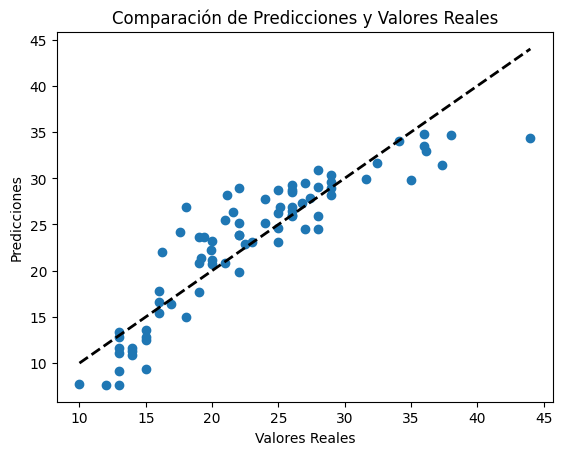

In [51]:
# Separar los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Predicciones y Valores Reales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Reto 4 - Evaluar el modelo

La puntuación r al cuadrado de un modelo nos indica cuánta variación explica el modelo. En un conjunto de datos típico, la mayoría de las observaciones difieren de la media. Cuando creamos un modelo, intentamos generar una ecuación que nos diga en qué medida cada observación difiere de la media. Obviamente, la gran mayoría de los modelos no son perfectos. Sólo pueden predecir una parte de la variación con respecto a la media, pero no toda. Atribuimos el resto de la diferencia entre el valor real y la media al error aleatorio. Nos gustaría que el error aleatorio explicara la menor parte posible de la variación. Por eso la puntuación r al cuadrado es una métrica importante.

En la siguiente celda, calcula la puntuación r al cuadrado del modelo. Para ello, primero calcula los valores predichos y asígnalos a `y_pred`.

In [48]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 10.502370329417325
R-squared: 0.7942349075428586


#### Nuestro siguiente paso es evaluar el modelo utilizando los datos de prueba. Queremos asegurarnos de que nuestro modelo no se ajusta en exceso a los datos. Esto significa que nuestro modelo no será capaz de generalizar bien fuera de los datos de entrenamiento.

En la celda siguiente, utiliza el modelo para generar los valores predichos para los datos de entrenamiento y asígnalos a `y_test_pred`. Calcula la puntuación r al cuadrado para los datos de prueba comparando los datos observados de `y_train` y los predichos de `y_test_pred`.

In [52]:
y_test_pred = model.predict(X_test)

# Calcular la puntuación R-squared del modelo para los datos de prueba
r2_test = r2_score(y_test, y_test_pred)

# Mostrar la puntuación R-squared para los datos de prueba
print("R-squared para los datos de prueba:", r2_test)

# Realizar predicciones sobre los datos de entrenamiento
y_train_pred = model.predict(X_train)

# Calcular la puntuación R-squared del modelo para los datos de entrenamiento
r2_train = r2_score(y_train, y_train_pred)

# Mostrar la puntuación R-squared para los datos de entrenamiento
print("R-squared para los datos de entrenamiento:", r2_train)

# Evaluar el rendimiento del modelo con el error cuadrático medio
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error para los datos de prueba:", mse_test)


R-squared para los datos de prueba: 0.7942349075428586
R-squared para los datos de entrenamiento: 0.8107227953093896
Mean Squared Error para los datos de prueba: 10.502370329417325


# Reto 5 - Mejorar el ajuste del modelo

Aunque la forma más común de mejorar el ajuste de un modelo es utilizando la regularización, hay otras formas más sencillas de mejorar el ajuste del modelo. La primera es crear un modelo más simple. La segunda es aumentar el tamaño de la muestra de entrenamiento.

Empecemos con la opción más sencilla y aumentemos el tamaño de la muestra de entrenamiento al 90% de los datos. Cre una nueva división train-test y denomina a los nuevos predictores y variables de respuesta `X_entrenamiento09`, `X_prueba09`, `y_entrenamiento09`, `y_prueba09`.

In [53]:
# Crear una nueva división train-test con 90% de los datos para el entrenamiento y 10% para la prueba
X_entrenamiento09, X_prueba09, y_entrenamiento09, y_prueba09 = train_test_split(X, y, test_size=0.1, random_state=42)

Inicializa un nuevo modelo. Nombre este modelo `auto_model09`. Ajusta el modelo a los nuevos datos de muestra.

R-squared para los datos de prueba: 0.8468911998183241
R-squared para los datos de entrenamiento: 0.8047940166959004
Mean Squared Error para los datos de prueba: 9.110087485479854
Mean Squared Error para los datos de entrenamiento: 11.888676694697898


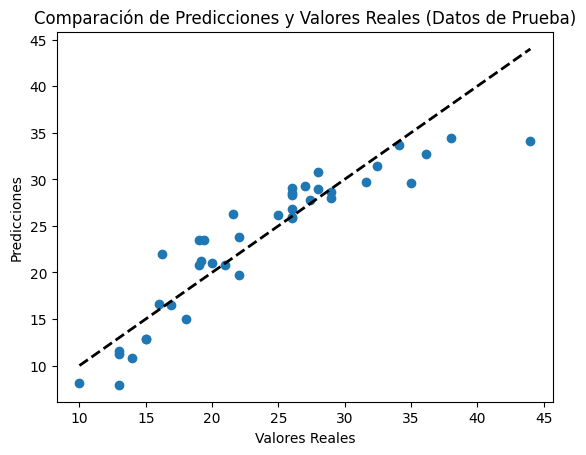

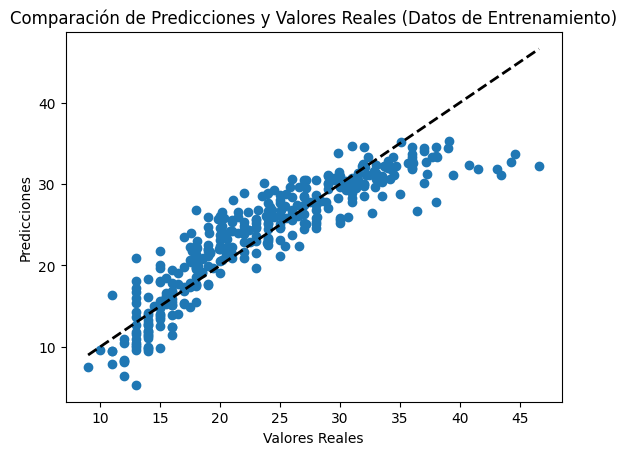

In [54]:
# Inicializar el modelo de regresión lineal
auto_model09 = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
auto_model09.fit(X_entrenamiento09, y_entrenamiento09)

# Realizar predicciones sobre los datos de prueba
y_prueba09_pred = auto_model09.predict(X_prueba09)

# Calcular la puntuación R-squared del modelo para los datos de prueba
r2_test09 = r2_score(y_prueba09, y_prueba09_pred)

# Mostrar la puntuación R-squared para los datos de prueba
print("R-squared para los datos de prueba:", r2_test09)

# Realizar predicciones sobre los datos de entrenamiento
y_entrenamiento09_pred = auto_model09.predict(X_entrenamiento09)

# Calcular la puntuación R-squared del modelo para los datos de entrenamiento
r2_train09 = r2_score(y_entrenamiento09, y_entrenamiento09_pred)

# Mostrar la puntuación R-squared para los datos de entrenamiento
print("R-squared para los datos de entrenamiento:", r2_train09)

# Evaluar el rendimiento del modelo con el error cuadrático medio
mse_test09 = mean_squared_error(y_prueba09, y_prueba09_pred)
print("Mean Squared Error para los datos de prueba:", mse_test09)

mse_train09 = mean_squared_error(y_entrenamiento09, y_entrenamiento09_pred)
print("Mean Squared Error para los datos de entrenamiento:", mse_train09)

# Graficar los valores reales frente a las predicciones para los datos de prueba
plt.scatter(y_prueba09, y_prueba09_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Predicciones y Valores Reales (Datos de Prueba)")
plt.plot([y_prueba09.min(), y_prueba09.max()], [y_prueba09.min(), y_prueba09.max()], 'k--', lw=2)
plt.show()

# Graficar los valores reales frente a las predicciones para los datos de entrenamiento
plt.scatter(y_entrenamiento09, y_entrenamiento09_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Predicciones y Valores Reales (Datos de Entrenamiento)")
plt.plot([y_entrenamiento09.min(), y_entrenamiento09.max()], [y_entrenamiento09.min(), y_entrenamiento09.max()], 'k--', lw=2)
plt.show()

Calcula los valores predichos y la puntuación r al cuadrado para nuestro nuevo modelo y los nuevos datos de muestra.

In [56]:
# Calcular la puntuación R-squared del modelo para los datos de prueba
r2_test09 = r2_score(y_prueba09, y_prueba09_pred)

# Mostrar la puntuación R-squared para los datos de prueba
print("R-squared para los datos de prueba:", r2_test09)

# Realizar predicciones sobre los datos de entrenamiento
y_entrenamiento09_pred = auto_model09.predict(X_entrenamiento09)

# Calcular la puntuación R-squared del modelo para los datos de entrenamiento
r2_train09 = r2_score(y_entrenamiento09, y_entrenamiento09_pred)



# Evaluar el rendimiento del modelo con el error cuadrático medio
mse_test09 = mean_squared_error(y_prueba09, y_prueba09_pred)
print("Mean Squared Error para los datos de prueba:", mse_test09)



R-squared para los datos de prueba: 0.8468911998183241
Mean Squared Error para los datos de prueba: 9.110087485479854


Calcula la puntuación r al cuadrado para el conjunto de prueba más pequeño. ¿Existe una mejora en la r al cuadrado de la prueba?

In [57]:
# Mostrar la puntuación R-squared para los datos de entrenamiento
print("R-squared para los datos de entrenamiento:", r2_train09)
mse_train09 = mean_squared_error(y_entrenamiento09, y_entrenamiento09_pred)
print("Mean Squared Error para los datos de entrenamiento:", mse_train09)

R-squared para los datos de entrenamiento: 0.8047940166959004
Mean Squared Error para los datos de entrenamiento: 11.888676694697898


# Reto bonus 2 - Backward Elimination 


La principal forma de producir un modelo de regresión lineal más simple es reducir el número de variables utilizadas en el modelo. En scikit-learn, podemos hacer esto mediante el uso de la eliminación recursiva de características. Puedes leer más sobre RFE [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

En la siguiente celda, vamos a importar RFE

In [58]:
from sklearn.feature_selection import RFE

Sigue la documentación e inicializa un modelo RFE utilizando el modelo de regresión lineal `auto_model`. Establece `n_features_to_select=3`.

In [60]:

auto_model = LinearRegression()

rfe = RFE(estimator=auto_model, n_features_to_select=3)

Ajusta el modelo e imprime la clasificación

In [61]:
rfe.fit(X, y)

# Mostrar las características seleccionadas
print("Características seleccionadas:", X.columns[rfe.support_])
print("Ranking de características:", rfe.ranking_)


Características seleccionadas: Index(['cylinders', 'acceleration', 'model_year'], dtype='object')
Ranking de características: [1 2 4 3 1 1]


La importancia de las características se clasifica de la más importante (1) a la menos importante (4). Genera un modelo con las tres características más importantes. Las características corresponden a los nombres de las variables. Por ejemplo, la característica 1 es «cilindros» y la característica 2 es «desplazamiento».

Realiza una división train-test en esta columna de datos reducida y llama a los datos divididos `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Utiliza una división del 80%.

In [62]:
selected_features = X.columns[rfe.support_]
ranking = rfe.ranking_
X_reduced = X[selected_features]
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


Genera un nuevo modelo llamado `auto_model_reduced` y ajusta este modelo. A continuación, calcula la puntuación r al cuadrado del modelo. ¿Ha mejorado la puntuación r al cuadrado?

In [63]:
auto_model.fit(X_train_reduced, y_train_reduced)

y_test_reduced_pred = auto_model.predict(X_test_reduced)


r2_test_reduced = r2_score(y_test_reduced, y_test_reduced_pred)


print("R-squared para los datos de prueba reducidos:", r2_test_reduced)


mse_test_reduced = mean_squared_error(y_test_reduced, y_test_reduced_pred)
print("Mean Squared Error para los datos de prueba reducidos:", mse_test_reduced)


R-squared para los datos de prueba reducidos: 0.7149033079956759
Mean Squared Error para los datos de prueba reducidos: 14.551501439656978


R ha bajado - empeora situacion 
MSE ha subido, - empeora la situacion
